# 1. Import Libraries:

In [1]:
!pip install wordcloud lazypredict

In [2]:
import pandas as pd
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import pickle
import time

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset (Centralized)

## Dataset 1:

In [3]:
train1 = pd.read_csv('/content/drive/MyDrive/UCR/Spring 2024/CS260/hate-speech-datasets/Twitter-Hate-Speech(kaggle)/Twitter Hate Speech/train_E6oV3lV.csv')
print("Training Set 1 :"% train1.columns, train1.shape)
test1 = pd.read_csv('/content/drive/MyDrive/UCR/Spring 2024/CS260/hate-speech-datasets/Twitter-Hate-Speech(kaggle)/Twitter Hate Speech/test_tweets_anuFYb8.csv')
print("Test Set 1 :"% test1.columns, test1.shape)

print('Train Set 1 -----')
print(train1.isnull().sum())
print('Test Set 1 -----')
print(test1.isnull().sum())
train1.head()

Training Set 1 : (31962, 3)
Test Set 1 : (17197, 2)
Train Set 1 -----
id       0
label    0
tweet    0
dtype: int64
Test Set 1 -----
id       0
tweet    0
dtype: int64


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Dataset 2:


In [4]:
df = pd.read_csv('/content/drive/MyDrive/UCR/Spring 2024/CS260/hate-speech-datasets/Twitter-Hate-Speech(kaggle)/Cyberbullying/toxicity_parsed_dataset.csv')
df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.90,0.10,0
1,1,` :Clarification for you (and Zundark's righ...,1.00,0.00,0
2,2,Elected or Electoral? JHK,1.00,0.00,0
3,3,`This is such a fun entry. Devotchka I once...,1.00,0.00,0
4,4,Please relate the ozone hole to increases in c...,0.80,0.20,0


In [5]:
#useful cols:
df = df[['index','oh_label','Text']]
df.head()

,index,oh_label,Text
0,0,0,This: :One can make an analogy in mathematical...
1,1,0,` :Clarification for you (and Zundark's righ...
2,2,0,Elected or Electoral? JHK
3,3,0,`This is such a fun entry. Devotchka I once...
4,4,0,Please relate the ozone hole to increases in c...


In [6]:
# renaming the selected cols:
# Before renaming the columns
print("\nBefore modifying column names:\n", df.columns)

df.rename(columns = {'index':'id','oh_label':'label','Text':'tweet'}, inplace = True)

# After renaming the columns
print("\nAfter modifying first column:\n", df.columns)


Before modifying column names:
 Index(['index', 'oh_label', 'Text'], dtype='object')

After modifying first column:
 Index(['id', 'label', 'tweet'], dtype='object')


In [7]:
# splitting the dataset into Train and Test:
train2, test2 = train_test_split(df, test_size=0.3,random_state=10, shuffle=True)

train2 = train2[['id','label','tweet']]
test2 = test2[['id','tweet']]

print("Training Set 2 :"% train2.columns, train2.shape)
print("Test Set 2 :"% test2.columns, test2.shape)
print('Train Set 2 -----')
print(train2.isnull().sum())
print('Test Set 2 -----')
print(test2.isnull().sum())
train2.head()

Training Set 2 : (111780, 3)
Test Set 2 : (47906, 2)
Train Set 2 -----
id       0
label    0
tweet    0
dtype: int64
Test Set 2 -----
id       0
tweet    0
dtype: int64


,id,label,tweet
69140,69140,0,", 30 July 2008 (UTC) *: *double-checks your us..."
157499,157499,0,born 31march 1995 Yes
83922,83922,0,dated prod|concern = confirmed sockpuppet] of ...
30953,30953,0,Where is that documented? It's certainly not...
150734,150734,0,`:Perfectly fine - we'll appreciate your contr...


## Merging Train and Test Datasets from Dataset1 and Dataset2:


In [8]:
# Merging two Train Data Sets
train = pd.concat([train1, train2], ignore_index = True)
train.shape

(143742, 3)

In [9]:
train['label'].value_counts()

label
0    130760
1     12982
Name: count, dtype: int64

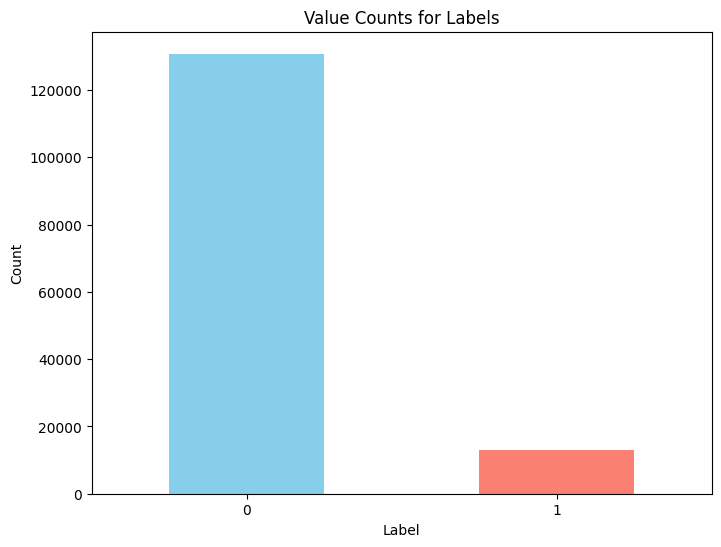

In [10]:
# Assuming you have a DataFrame named 'train' with a column 'label'
label_counts = train['label'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Value Counts for Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Merging two Test Data Sets
test = pd.concat([test1,test2], ignore_index = True)
print(test.shape)
test.head()

(65103, 2)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# 3. Data Analysis and Cleaning

In [13]:
# Clean Data:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [16]:
# upsampled
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority,
                                 replace=True,
                                 n_samples=len(train_majority),
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

label
1    130760
0    130760
Name: count, dtype: int64

In [19]:
print(train_clean.shape)
# train_clean

(143742, 3)


In [20]:
print(train_upsampled.shape)
# train_upsampled

(261520, 3)


## Visualizing the Data


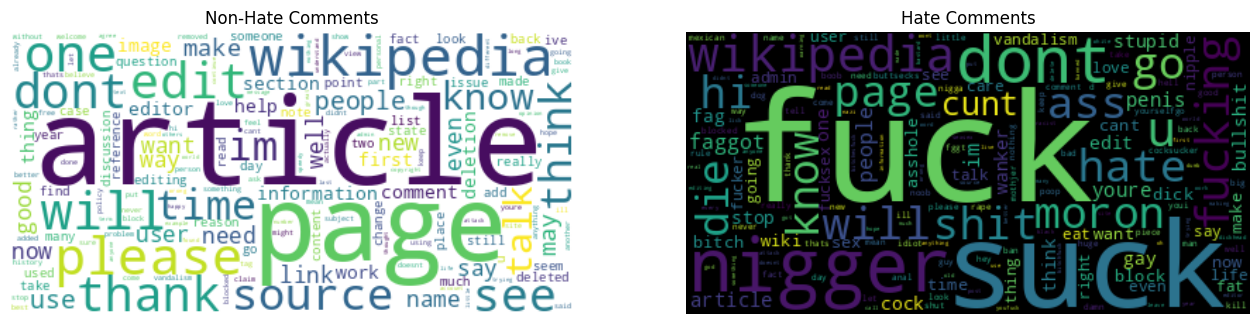

In [21]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

<Figure size 1000x600 with 0 Axes>

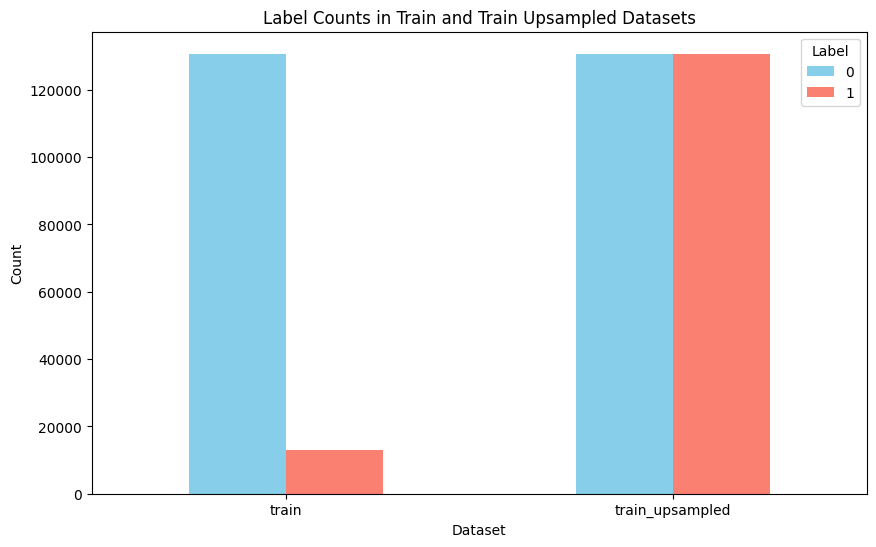

In [22]:
# Counting the labels
train_clean_counts = train_clean['label'].value_counts()
train_upsampled_counts = train_upsampled['label'].value_counts()

# Creating a DataFrame to hold the counts
counts_df = pd.DataFrame({
    'train': train_clean_counts,
    'train_upsampled': train_upsampled_counts
}).transpose()

# Plotting
plt.figure(figsize=(10, 6))
counts_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Label Counts in Train and Train Upsampled Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()


--------------After Upsampling the Minority Class---------------


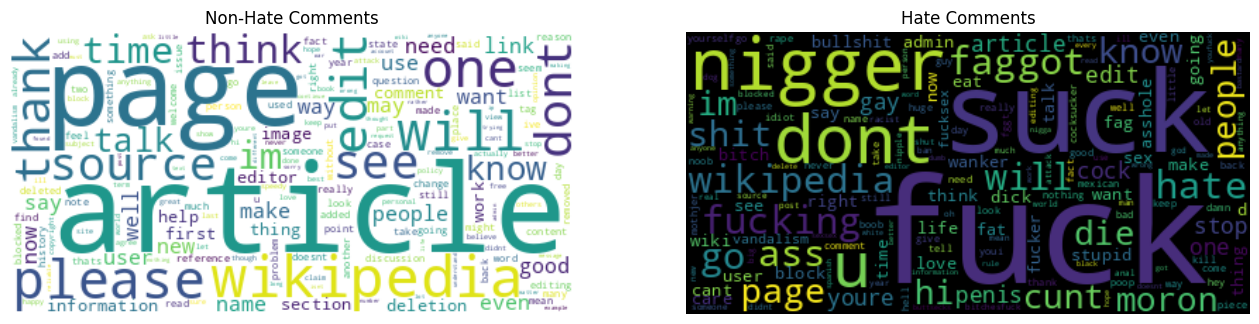

In [23]:
print('--------------After Upsampling the Minority Class---------------')
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [29]:
dt_trasformed = train_upsampled[['label', 'tweet']]
# print(dt_trasformed)
y = dt_trasformed.iloc[:, :-1].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [30]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
print(y.shape)

(261520, 2)


In [32]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_hate

array([0., 0., 0., ..., 1., 1., 1.])

In [33]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(train_upsampled['tweet']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
x.shape

(261520, 2000)

## Train & Test splitting the Data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.30, random_state = 1)

# 4. Testing With Different Models


## Decision Tree:

In [92]:
# Using Decision Tree
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_dt.fit(x_train, y_train)

# End timer
end_time = time.time()

In [93]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 341.345213 seconds


In [94]:
# save the model to disk
filename = 'twitter_with_two_dataset_model_Decision_Tree.sav'
pickle.dump(classifier_dt, open(filename, 'wb'))

### Matrix Confusion

[[39296   200]
 [ 2767 36193]]


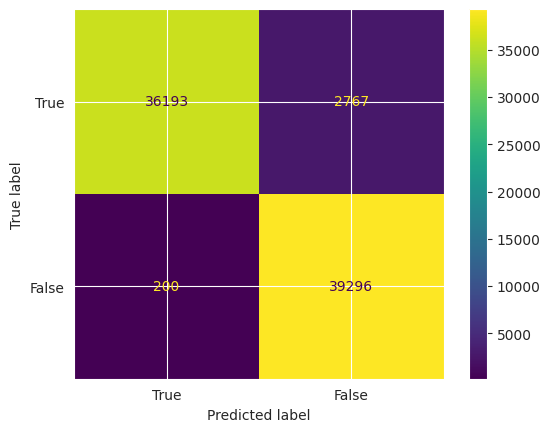

In [98]:
from sklearn.metrics import confusion_matrix
#Decision Tree
y_pred_dt = classifier_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [99]:
yhat_dt = classifier_dt.predict_proba(x_test)
print('y_hat_shape for Decision Tree: ',yhat_dt.shape)
yhat_dt = yhat_dt[:, 1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, yhat_dt)
auc_dt = round(metrics.roc_auc_score(y_test, yhat_dt), 4)

y_hat_shape for Decision Tree:  (78456, 2)


### Accuracy and F1 Score

In [101]:
from sklearn.metrics import accuracy_score, f1_score

dt_score = accuracy_score(y_test, y_pred_dt)
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_test, y_pred_dt, labels = [1,0]))
print ('--' * 20)

----------------------------------------
Decision Tree Accuracy:  0.962182624655858
F1 score:  0.9606253234774992
----------------------------------------


## K-Nearest Neighbors


In [102]:
# Using KNN
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Start timer
start_time = time.time()

classifier_knn.fit(x_train, y_train)

# End timer
end_time = time.time()

In [103]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.027652 seconds


In [104]:
# save the model to disk
filename = 'twitter_with_two_dataset_model_KNN.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))

### Confusion Matrix

In [1]:
#KNN
y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

NameError: name 'classifier_knn' is not defined

In [ ]:
yhat_knn = classifier_knn.predict_proba(x_test)
print('y_hat_shape for KNN: ',yhat_knn.shape)
yhat_knn = yhat_knn[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, yhat_knn)
auc_knn = round(metrics.roc_auc_score(y_test, yhat_knn), 4)

### Accuracy and F1 Score

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn)
print ('--' * 20)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))
print ('--' * 20)

## Logistic Regression

In [36]:
# Using Logistic Regression
classifier_lr = LogisticRegression(random_state = 0)

# Start timer
start_time = time.time()

classifier_lr.fit(x_train, y_train)

# End timer
end_time = time.time()

In [37]:
# Calculate training time
training_time = end_time - start_time
print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

Training time of Logistic Regression: 71.471414 seconds


In [38]:
# save the model to disk
filename = 'twitter_with_two_dataset_model_Logistic_Regression.sav'
pickle.dump(classifier_lr, open(filename, 'wb'))

### Confusion Matrix

In [ ]:
#Logistic Regression
y_pred_lr=classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
yhat_lr = classifier_lr.predict_proba(x_test)
print('y_hat_shape for Logistic Regression: ',yhat_lr.shape)
yhat_lr = yhat_lr[:, 1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, yhat_lr)
auc_lr = round(metrics.roc_auc_score(y_test, yhat_lr), 4)

### Accuracy and F1 Score

In [ ]:
lr_score = accuracy_score(y_test, y_pred_lr)
print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_test, y_pred_lr, labels = [1,0]))
print ('--' * 20)

## Random Forest

### Random Forest Training

In [31]:
# Using Random Forest
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_rf.fit(x_train, y_train)

# End timer
end_time = time.time()

In [32]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Random Forest: {training_time:.6f} seconds")

Training time of Random Forest: 54.700054 seconds


In [33]:
# save the model to disk
filename = 'twitter_with_two_dataset_model_Random_Forest.sav'
pickle.dump(classifier_rf, open(filename, 'wb'))

### Confusion Matrix

[[39306   190]
 [ 1246 37714]]


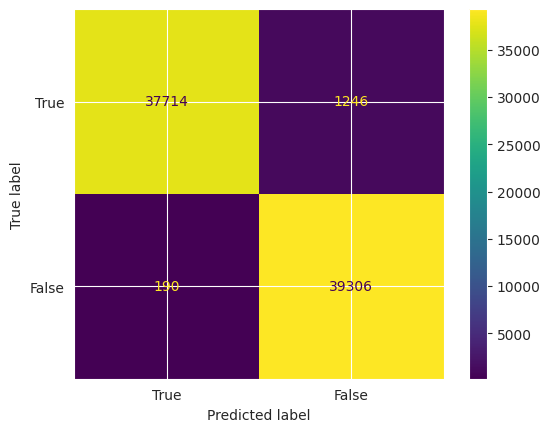

In [36]:
#Random Forest
y_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

### Accuracy and F1 Score

In [35]:
# Random Forest
rf_score = accuracy_score(y_test, y_pred_rf)
print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_test, y_pred_rf, labels = [1,0]))
print ('--' * 20)

----------------------------------------
Random Forest Accuracy:  0.9816967472213725
F1 score:  0.9813176519567026
----------------------------------------


# 5. Generating the Accuracy & F1 Score (all together)


In [ ]:
rf_score = accuracy_score(y_test, y_pred_rf)
knn_score = accuracy_score(y_test, y_pred_knn)
lr_score = accuracy_score(y_test, y_pred_lr)
dt_score = accuracy_score(y_test, y_pred_dt)
np_score = accuracy_score(y_test, y_pred_np)

print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_test, y_pred_rf, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_test, y_pred_lr, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_test, y_pred_dt, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Naive Bayes Accuracy: ', str(np_score))
print('F1 score: ', f1_score(y_test, y_pred_np, labels = [1,0]))
print ('--' * 20)
print ('')